음성 데이터 이해

In [3]:
!pip install pydub

In [4]:
from pydub import AudioSegment

def convert_m4a_to_wav(m4a_path, wav_path):
    audio = AudioSegment.from_file(m4a_path, format="mp3")
    audio.export(wav_path, format="wav")

m4a_path = "hihi.mp3"
wav_path = "hihi.wav"
convert_m4a_to_wav(m4a_path, wav_path)

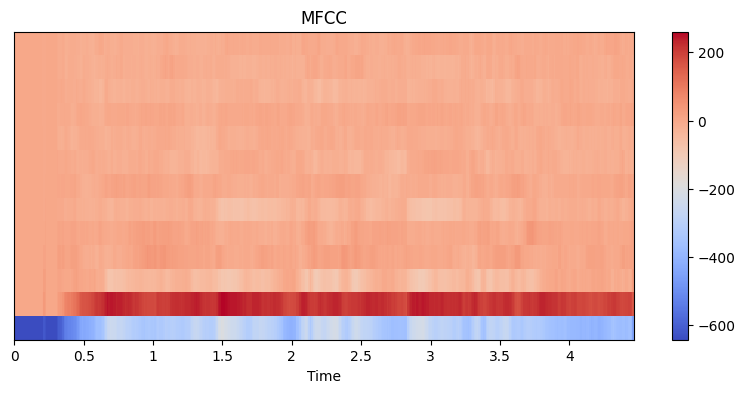

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 변환된 WAV 파일에서 음성 데이터를 로드
y, sr = librosa.load(wav_path, sr=None)  # sr=None으로 원래 샘플링 주파수 유지

# MFCC 추출
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [11]:
pd.DataFrame(mfcc)

,0,1,2,3,4,5,6,7,8,9,...,409,410,411,412,413,414,415,416,417,418
0,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,-643.09314,...,-376.511566,-376.372681,-369.449127,-368.548462,-381.687775,-376.225525,-364.473175,-361.477295,-379.463776,-451.481720
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,193.965332,189.656006,183.049255,189.279633,191.860443,192.804626,195.623672,195.003448,188.714325,161.698944
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-7.058974,-7.682885,-18.381153,-13.424456,-1.779652,-4.148952,-12.347763,-15.637865,-5.204551,26.482548
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-0.394382,8.975231,18.396103,18.062141,9.730522,11.952024,9.500351,10.408512,16.003386,13.170862
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-5.954680,-4.098814,-2.048194,1.485962,-0.291756,1.187720,0.666898,5.124463,11.824157,10.090086
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-8.788034,-15.639474,-27.760696,-27.973637,-19.601156,-18.551579,-13.933467,-7.877118,-2.702399,2.084084
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,15.097685,14.984168,16.129185,7.025935,-1.931108,-0.283647,10.335436,10.859251,9.639687,3.860389
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-10.266665,-4.202570,3.626968,-6.499915,-24.252489,-21.107756,-13.722322,-17.019861,-20.363880,-18.455315
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-10.111344,-5.436208,-14.824645,-19.408503,-21.404583,-15.144218,-11.780197,-9.440409,-11.266819,-14.453705
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.777170,6.823263,-7.218859,-5.039330,1.541468,4.643319,3.440115,6.094752,11.621704,9.005766


In [7]:
import pandas as pd

# MFCC를 데이터프레임으로 저장
mfcc_df = pd.DataFrame(mfcc.T)  # 시간축으로 transpose
mfcc_df.to_csv('mfcc_features.csv', index=False)

Whisper 모델

In [8]:
!pip install whisper
!pip install -U openai-whisper

In [9]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("hihi.mp3")  # 텍스트 변환
print(result["text"])


/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location=device)
/usr/local/li

 안녕하세요.
